# Linear Regression Exercise `R`

This exercise is going to be a little different in the sense that we won't be guiding in a question-by-question format. Instead, we are going to let you construct a linear model in your choice of `R` or `Python`, whichever you prefer.

The prediction problem is to predict `height` from the `'/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv'` dataset. You can use any variable or combination of variables in order to predict `height`.

You are not going to be graded upon the performance of the model itself, but please approach this as an actual prediction problem. That being said, you should split the data into training and testing sets, in which your model is trained on your training set while the performance is assessed on the testing set. Be sure to predict some output with your testing inputs.

The purpose of this assignment is to demonstrate your ability to use regression to develop a machine learning model. Feel free to include anything that demonstrates your understanding of model development and model refinement including data exploration and even a written description of your reasoning. 

Like always, feel free to ask questions along the way if you get stuck at any point. We are more than happy to help!

To add execution cells, click in this cell.
Then, in the notebook menu: `Insert > Insert Cell Below`

gender,height,hand.length,foot.length
<int>,<dbl>,<dbl>,<dbl>
1,1760.2,208.6,269.6
1,1730.1,207.6,251.3
1,1659.6,173.2,193.6
1,1751.3,258.0,223.8
1,1780.6,212.3,282.1
1,1818.3,213.4,268.0


,gender,height,hand.length,foot.length
gender,1.0000000,-0.7872070,-0.7513013,-0.7233857
height,-0.7872070,1.0000000,0.9510930,0.8624945
hand.length,-0.7513013,0.9510930,1.0000000,0.9497873
foot.length,-0.7233857,0.8624945,0.9497873,1.0000000



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.307 -10.446  -1.042   9.318 186.692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 132.9105    52.4599   2.534    0.013 *  
hand.length   7.7367     0.2634  29.371   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.02 on 91 degrees of freedom
Multiple R-squared:  0.9046,	Adjusted R-squared:  0.9035 
F-statistic: 862.7 on 1 and 91 DF,  p-value: < 2.2e-16



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.841 -11.463   0.273   9.873 156.465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4551    55.8231   0.098    0.922    
hand.length  10.9597     0.7672  14.285  < 2e-16 ***
foot.length  -2.0689     0.4678  -4.423 2.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.45 on 90 degrees of freedom
Multiple R-squared:  0.9216,	Adjusted R-squared:  0.9199 
F-statistic: 529.1 on 2 and 90 DF,  p-value: < 2.2e-16


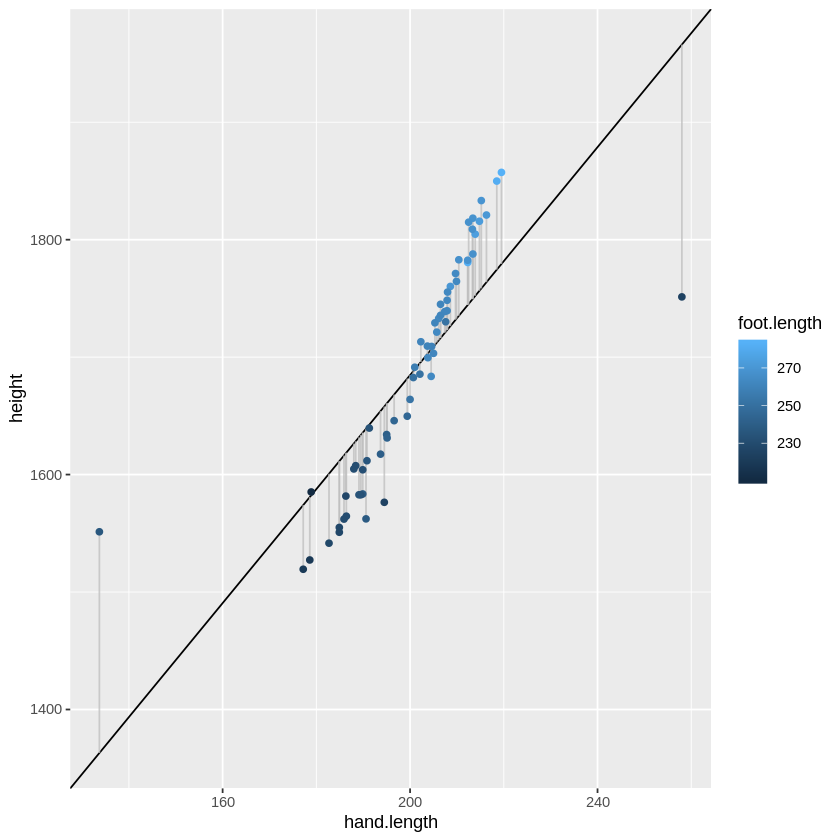

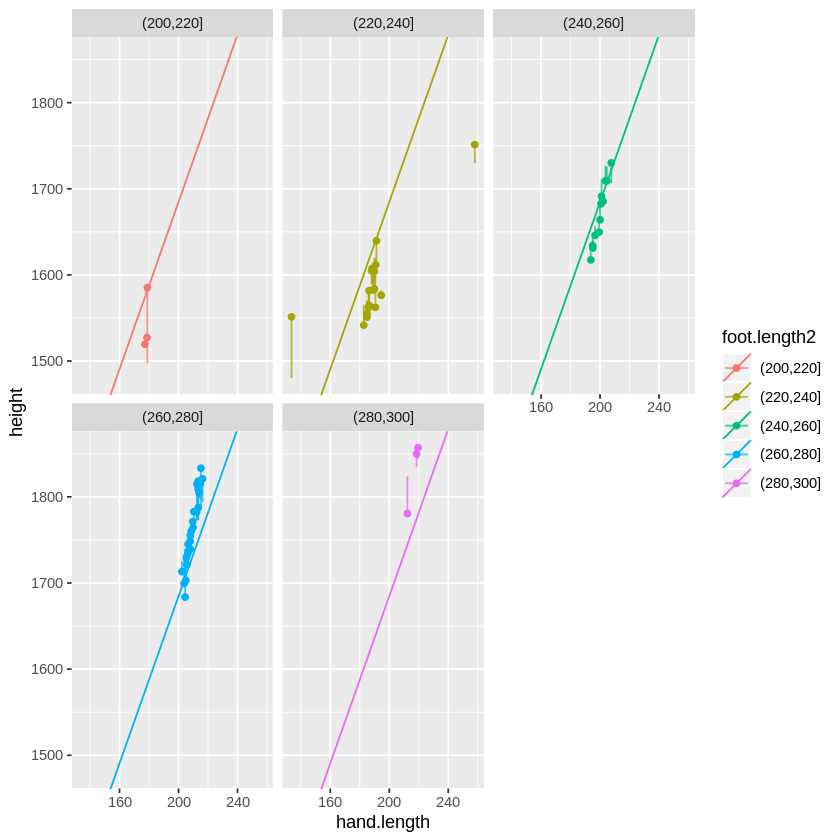

In [34]:
library(dplyr)
library(caret)
library(ggplot2)

stature <- read.csv('/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv')
head(stature)

set.seed(100)
train_ind <- sample(seq_len(nrow(stature)), size = (nrow(stature)*.6))

train <- stature[train_ind,]
test <- stature[-train_ind,]

nums <- sapply(train, is.numeric)
cor(train[ , nums])

frmla <- height ~ hand.length

m1 <- train(frmla, train, method = "lm")
summary(m1)

m2 <- train(frmla, test, method = "lm")


intcpt <- coef(m2$finalModel)[1]
slp <- coef(m2$finalModel)[2]


ggplot(test, aes(x = hand.length, y = height, color = foot.length))  + 
    geom_abline(intercept = intcpt, slope = slp)+
    geom_segment(aes(x=hand.length, xend=hand.length, y=height, yend=fitted.values(m2)), colour = "grey", alpha = .75) +
    geom_point()

# Determined it would be a good idea to include foot length as well.

frmla2 <- height ~ hand.length + foot.length

m3 <- train(frmla2, train, method = "lm")
summary(m3)

# This model does give us a slightly better R-squared value.

m4 <- train(frmla2, test, method = "lm")
test$foot.length2 <- cut(test$foot.length, seq(200, 300, 20))
test$pred <- predict(m4, newdata=test)


 ggplot(test, aes(x = hand.length, y = height, colour = foot.length2)) + facet_wrap(~ foot.length2) +
     geom_abline(aes(intercept = intcpt, slope = slp, color=foot.length2))+
     geom_segment(aes(x=hand.length, xend=hand.length, y=height, yend=pred), alpha = .75) +
     geom_point(aes(colour = foot.length2))

# I believe the first visualization is actually better, but I did the second one for practice. Still not entirely sure
# what the best way to visualize a model with 2 numerical predictors is.

# Save your notebook, then `File > Close and Halt`